# Multiple Linear Regression Project

This project demonstrates how to implement Multiple Linear Regression using both manual calculation and scikit-learn's built-in `LinearRegression` model. The dataset used relates advertising spend across various channels (TV, Radio, Newspaper) to the resulting product sales.

The project includes:
- Data loading and preprocessing
- Manual computation of regression parameters
- Predictions using the derived equation
- Model training and prediction using scikit-learn
- Comparison of predicted values with actual outcomes
- Evaluation using regression metrics
- Visualizations for insights


In [113]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

##Data Import
**Dataset Description**

This dataset contains advertising budgets and corresponding sales for a product. It includes the following columns:

- `TV`: Budget spent on TV advertisements (in thousands of dollars)
- `Radio`: Budget spent on Radio advertisements (in thousands of dollars)
- `Newspaper`: Budget spent on Newspaper advertisements (in thousands of dollars)
- `Sales`: The number of units sold (target variable)

Objective: Predict `Sales` using the amount spent on each advertisement channel.


In [51]:
#Loading Dataset
df=pd.read_csv("/content/sample_data/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [52]:
#checking for Null Values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


 Data Preprocessing

In [53]:
#Deciding columns for training and Testing Data
x=df[["TV",	'Radio',	'Newspaper']] #Training Set
y=df["Sales"]  #Testing Set

Scikit-learn Regression

In [54]:
#Spliting Data into Training and Testing Data using Sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [55]:
#Model Training using Sklearn

from sklearn.linear_model import LinearRegression

Lr_model1=LinearRegression()
Lr_model1.fit(x_train,y_train)

LinearRegression()

In [56]:
#Predictiong the Outcome
y_pred=Lr_model1.predict(x_test)
y_pred

array([15.81794247, 10.15032354,  8.26737799, 18.25580684, 18.06466407,
       17.24354571,  8.81294515, 22.04513076, 12.38208193, 21.03691149,
        9.58287515, 20.13791992, 10.69692702,  9.05217041, 17.19403767,
       10.33653542,  8.63490536, 17.27389797, 18.24930692, 19.29279069,
       18.94026036, 19.46168254, 11.11298733, 10.6675807 , 18.0316489 ,
       14.58414874, 16.58323824,  9.27911751, 18.82160438, 17.18558892,
       20.11211809, 16.22950562, 15.87936272, 14.05507975,  7.89699942,
       12.12455603, 21.74608041, 21.4076981 , 19.58225049, 19.50042709])

In [135]:
#Prediction on New Data Point
new_entry=np.array([[107.3,48.3,15.0]])
new_entry.shape

(1, 3)

In [136]:
#Reshaping for single unit output
new_score=Lr_model1.predict(new_entry.reshape(1,-1))
new_score.shape

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(1,)

In [137]:
print(f"Prediction of New Data point is:{new_score[0]:.2f}")

Prediction of New Data point is:15.45


In [94]:
m=Lr_model1.coef_
m

array([0.05536768, 0.102883  , 0.00233839])

In [93]:
b=Lr_model1.intercept_
b

4.499831369256482

Manual Linear Regression Prediction

In [138]:
#Now we know intercept and Coefficient, lets calculate y pred manually
#y=mx+b (equation of line)
y_pred_manual1=m*new_entry+b
print(y_pred_manual1)
print('OR')
#Single unit prediction, same as previous
y_pred_manual2 = np.dot(new_entry, m) + b
print(y_pred_manual2)

[[10.44078304  9.46908037  4.53490717]]
OR
[15.44510785]


Evaluation Metrics

In [64]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMean Absolute Error: {mae}\nMean Squared Error: {mse}\nR² Score: {r2}")

Model Performance:
Mean Absolute Error: 1.4005398146683294
Mean Squared Error: 3.091721330322738
R² Score: 0.8407131803267819


##Visualization

In [145]:
print("Length of y_test:", len(y_test))
print("Length of y_pred_manual:", len(y_pred_manual))


Length of y_test: 40
Length of y_pred_manual: 1


In [149]:
x_test_np = x_test.to_numpy()  # ensures shape compatibility
y_pred_manual = np.dot(x_test_np, m) + b


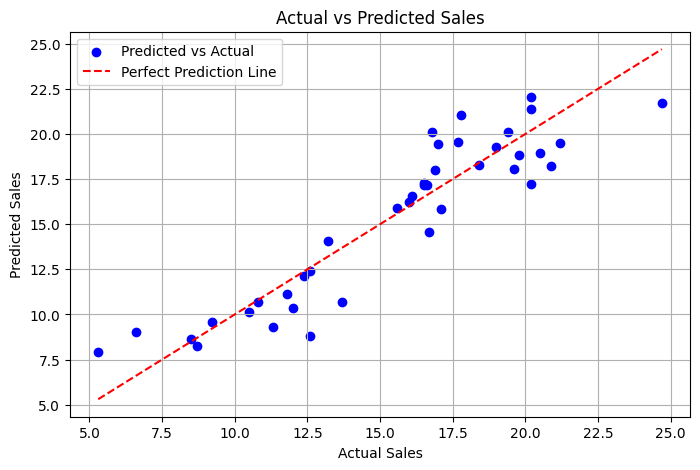

In [151]:
# Convert if still Pandas Series/DataFrame
y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test
y_pred_np = y_pred_manual

# Final check to avoid crash
assert len(y_test_np) == len(y_pred_np), "y_test and y_pred_manual must be same length"

# Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Predicted vs Actual')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()],
         'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


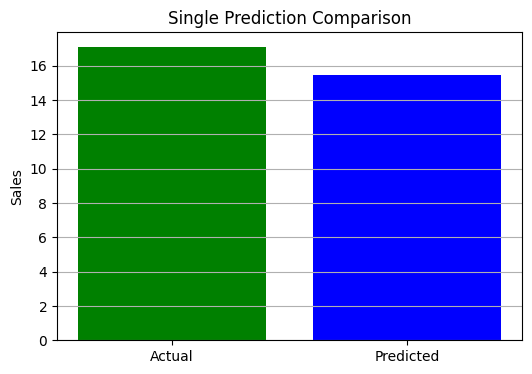

In [144]:
#Single Sample Comparison (Bar Plot)
plt.figure(figsize=(6, 4))
plt.bar(['Actual', 'Predicted'], [y_test_np[0], y_pred_np[0]], color=['green', 'blue'])
plt.title("Single Prediction Comparison")
plt.ylabel("Sales")
plt.grid(axis='y')
plt.show()



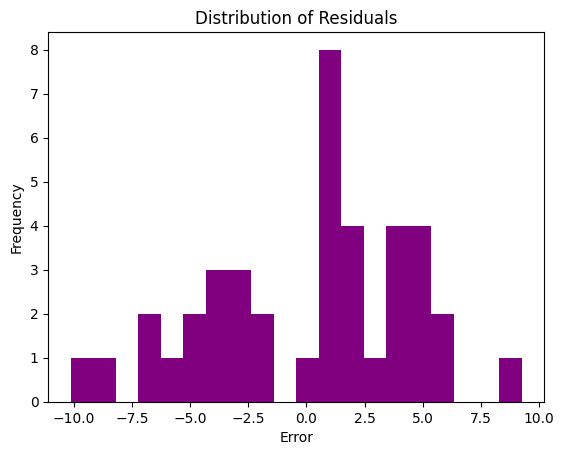

In [127]:
import matplotlib.pyplot as plt

# Error
residuals = y_test - y_pred_manual

plt.hist(residuals, bins=20, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

## Final Summary

The manual implementation and scikit-learn model both produced similar results, validating the accuracy of the mathematical approach. Key metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score help assess the model's performance.

The model effectively captures the relationship between advertising spend and product sales, showing the highest impact from TV and Radio channels.

This project strengthens the understanding of linear regression and model evaluation, and it serves as a portfolio-ready showcase for data science proficiency.

